### Working on svm

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [4]:
# Load iris dataset

iris = datasets.load_iris()
X = iris.data[:, :2]  # Used only  first two features
y = iris.target

In [5]:
# Used only classes 0 (setosa) and 1 (versicolor)
binary_mask = y < 2
X = X[binary_mask]
y = y[binary_mask]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [14]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Sepal Length (standardized)")
    plt.ylabel("Sepal Width (standardized)")
    plt.title(title)
    plt.show()


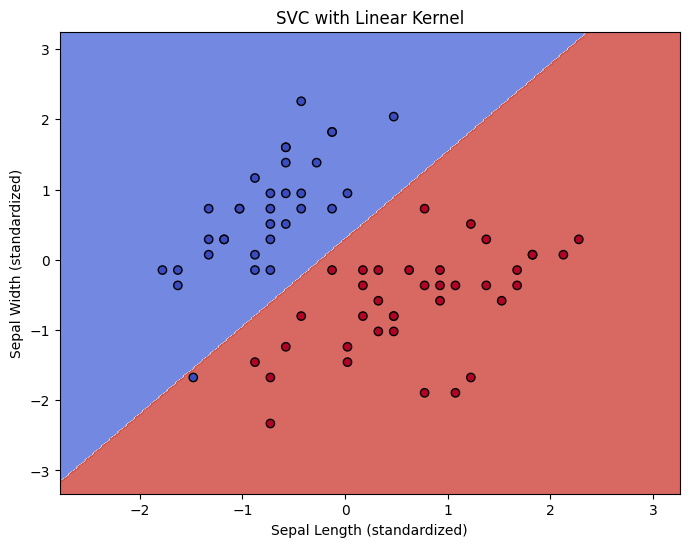

In [15]:
plot_decision_boundary(linear_svc, X_train_scaled, y_train, "SVC with Linear Kernel")


In [10]:
rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_scaled, y_train)


SVC()

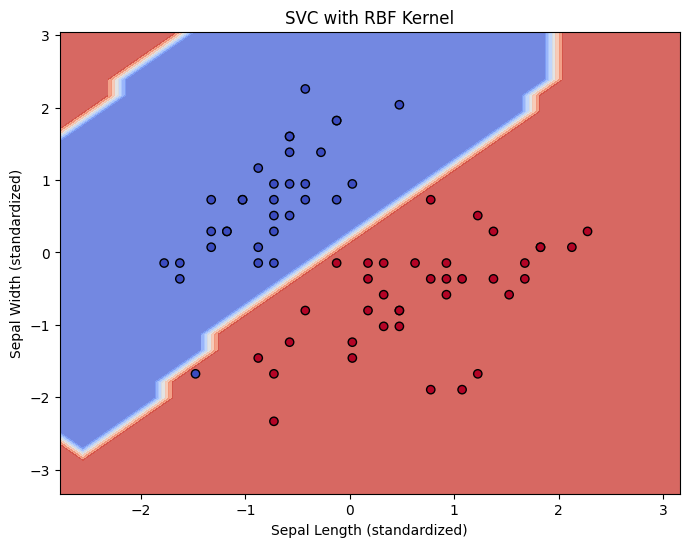

In [11]:
plot_decision_boundary(rbf_svc, X_train_scaled, y_train, "SVC with RBF Kernel")


In [12]:
print("Linear SVC Accuracy:", linear_svc.score(X_test_scaled, y_test))
print("RBF SVC Accuracy:", rbf_svc.score(X_test_scaled, y_test))

Linear SVC Accuracy: 1.0
RBF SVC Accuracy: 1.0


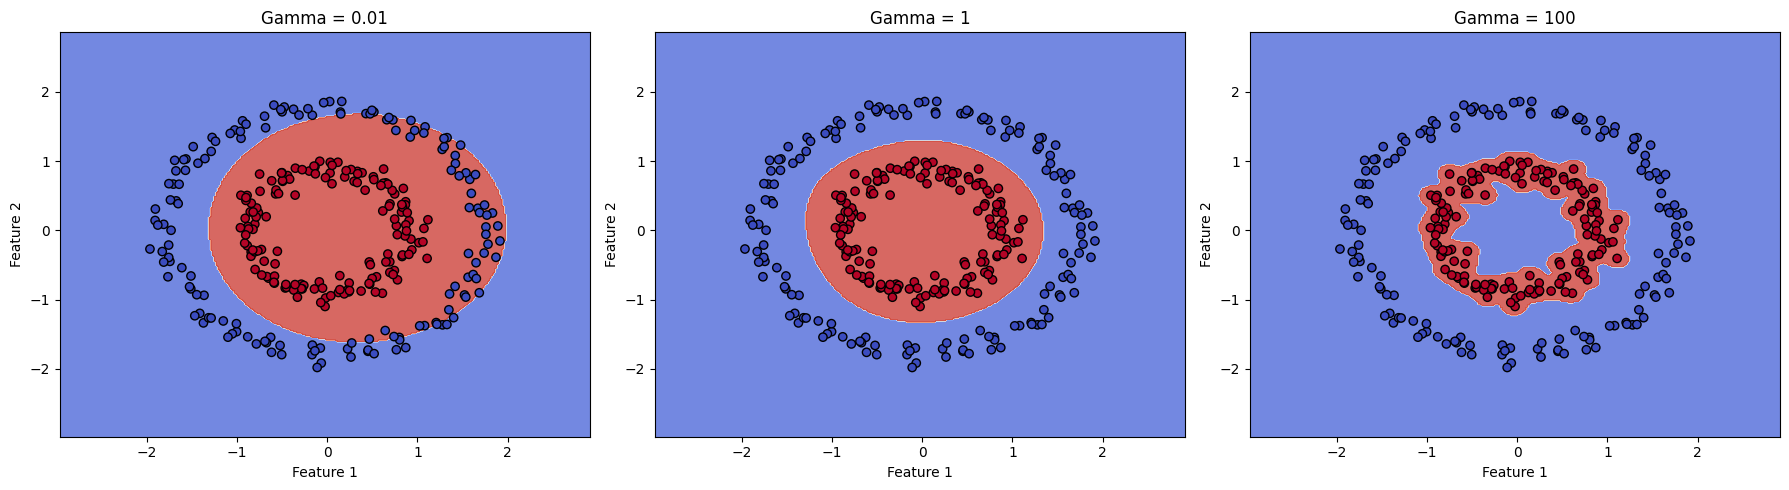

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Generate circular data (non-linearly separable)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Different gamma values to compare
gammas = [0.01, 1, 100]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot decision boundary for each gamma
for ax, gamma in zip(axes, gammas):
    model = SVC(kernel='rbf', gamma=gamma, C=1.0)
    model.fit(X_scaled, y)

    # Create meshgrid
    h = 0.02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f"Gamma = {gamma}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


observation

    Small gamma (0.01) → SVM looks at the data from far away → smooth, but may miss details.

    Medium gamma (1) → SVM sees a moderate area → captures shape well.

    High gamma (100) → SVM focuses too narrowly → overreacts to noise.

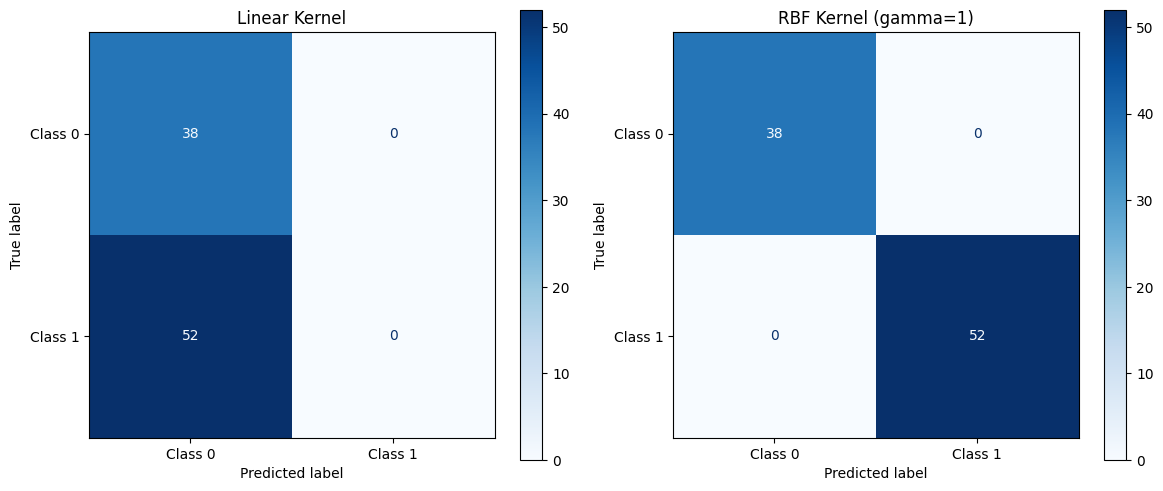

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Linear SVM
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)

# Train RBF SVM (with gamma=1, balanced as seen earlier)
rbf_svc = SVC(kernel='rbf', gamma=1, C=1.0)
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)

# Create confusion matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_linear, display_labels=["Class 0", "Class 1"]).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Linear Kernel")

ConfusionMatrixDisplay(cm_rbf, display_labels=["Class 0", "Class 1"]).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("RBF Kernel (gamma=1)")

plt.tight_layout()
plt.show()
